# 1. Create a plot that shows performance (AUC) of random forest models (x axis) with 10, 20, 30, … 200 (y axis) on training and testing data (build all 20 models to complete the assignment). Use highUtilizationPredictionV2wco dataset.

In [50]:
import sqlite3
import pandas as pd

In [51]:
conn = sqlite3.connect('C://Users//akhil//Desktop//HAP 880//Week 2//testclaims_hu.db')

In [52]:
df = pd.read_sql('select * from highUtilizationPredictionV2wco', conn)

In [53]:
df=df.join(pd.get_dummies(df.race))

In [54]:
df.head()

,index,race,age,patient_id,ELIX1,ELIX2,ELIX3,ELIX4,ELIX5,ELIX6,...,drugs_m11-12,HighUtilizationY2,claimCount,A,Am.N,B,H,O,U,W
0,0,B,71,PAT136597,0,0,0,0,0,1,...,1,1,160,0,0,1,0,0,0,0
1,1,A,86,PAT119838,0,0,0,0,0,0,...,0,0,24,1,0,0,0,0,0,0
2,2,W,70,PAT11289,1,0,0,0,0,0,...,0,0,52,0,0,0,0,0,0,1
3,3,W,75,PAT178745,0,0,0,0,1,0,...,0,0,15,0,0,0,0,0,0,1
4,4,W,77,PAT50922,0,0,0,0,1,0,...,4,0,66,0,0,0,0,0,0,1


In [55]:
cols=list(df.columns)

In [56]:
cols.remove('index')
cols.remove('race')
cols.remove('patient_id')
cols.remove('HighUtilizationY2')
cols.remove('claimCount')

In [146]:
sz=df.index.size

In [58]:
from sklearn.utils import shuffle
df=shuffle(df)

In [59]:
import numpy as np
rnd=np.random.rand(1,sz)
df['rnd']=list(rnd[0])
df=df.sort_values('rnd')

In [60]:
tr=df[:int(sz*0.8)] # split to training and testing
ts=df[int(sz*0.8):] # testing

#Random Forest classifier

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf = RandomForestClassifier()

In [63]:
rf.fit(tr[cols], tr['HighUtilizationY2'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
probs_rf = rf.predict_proba(ts[cols])

In [65]:
res = pd.DataFrame()

In [66]:
res['HighUtilizationY2'] = ts['HighUtilizationY2']

In [67]:
res['rf'] = probs_rf[:,1]

In [68]:
res.head(10)

,HighUtilizationY2,rf
50125,1,0.1
104019,0,0.0
85633,0,0.0
77985,0,0.0
13647,0,0.0
44288,1,0.1
18681,1,0.3
35007,0,0.1
108414,0,0.0
50150,0,0.1


In [69]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

In [70]:
fpr_rf, tpr_rf, threshold_rf = roc_curve(res['HighUtilizationY2'] , res['rf'])

In [71]:
auc_rf = auc(fpr_rf ,tpr_rf)

In [72]:
print(auc_rf)

0.7504726211049393


In [73]:
rf200=RandomForestClassifier(n_estimators=200)
rf200.fit(tr[cols],tr['HighUtilizationY2'])
probs_rf200=rf200.predict_proba(ts[cols])
fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['HighUtilizationY2'],probs_rf200[:,1])
auc_rf200=auc(fpr_rf200,tpr_rf200)
print(auc_rf200)

0.811414446863566


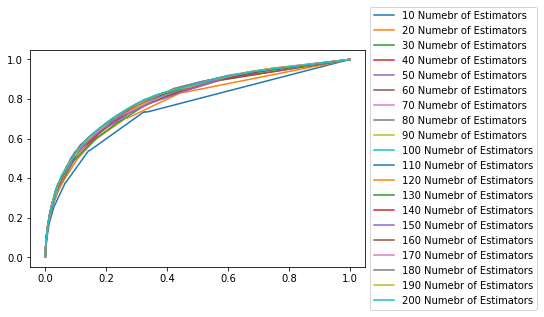

In [130]:
rf = dict()
probs_rf = dict()
fpr_rf = dict()
tpr_rf = dict() 
thresholds_rf = dict()
auc_rf = dict()
for n in range(10, 210, 10):
    rf[n]=RandomForestClassifier(n_estimators =n)
    rf[n].fit(tr[cols],tr['HighUtilizationY2'])
    probs_rf[n]=rf[n].predict_proba(ts[cols])
    fpr_rf[n], tpr_rf[n], thresholds_rf[n] = roc_curve(ts['HighUtilizationY2'],probs_rf[n][:,1])
    auc_rf[n]=auc(fpr_rf[n],tpr_rf[n])
    plt.plot(fpr_rf[n], tpr_rf[n],label = "{} Numebr of Estimators".format(n))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# 2.Rank input attributes in the data. Create a plot that shows dependency between number of selected top attributes (x axis) and AUC of learned model (y axis). You can use any attribute selection method and any classifier you want. Use highUtilizationPredictionV2wco dataset 

In [74]:
from sklearn.feature_selection import mutual_info_classif

In [89]:
mic = mutual_info_classif(tr[cols], tr['HighUtilizationY2'])

In [90]:
mic

array([8.21122545e-04, 4.73913149e-03, 0.00000000e+00, 4.10975344e-04,
       2.87448601e-03, 5.26921216e-04, 1.44548432e-02, 2.34918030e-03,
       9.13188851e-03, 1.04037681e-02, 7.13811437e-04, 1.89116756e-03,
       2.88169675e-03, 9.42158764e-03, 1.77589424e-02, 1.32701422e-03,
       3.90101391e-03, 1.73626110e-04, 7.40905019e-03, 0.00000000e+00,
       1.57953528e-03, 1.08604803e-02, 1.06833907e-03, 1.11706231e-03,
       2.39685369e-03, 9.00591037e-04, 1.33385895e-02, 8.42742547e-03,
       7.74455075e-04, 5.09270622e-03, 1.06172040e-02, 3.36353963e-03,
       4.48297003e-04, 0.00000000e+00, 2.01597617e-02, 5.24883925e-03,
       0.00000000e+00, 2.14192451e-04, 1.11286028e-03, 1.92565594e-02,
       8.48612757e-03, 1.89020813e-02, 0.00000000e+00, 4.36953492e-04,
       0.00000000e+00, 1.68916951e-02, 1.52990631e-02, 0.00000000e+00,
       1.62015030e-03, 1.23808453e-02, 1.70047250e-02, 0.00000000e+00,
       5.10203048e-03, 4.43023720e-03, 3.78432359e-03, 4.71780294e-03,
      

In [91]:
s = pd.DataFrame()
s['att'] = cols
s['mic'] = mic

In [81]:
 from sklearn.feature_selection import chi2

In [98]:
chi2 = chi2(tr[cols], tr['HighUtilizationY2'])

In [102]:
s['chi2'] = chi2[0]

In [100]:
cols_sel_mic=s.sort_values('mic', ascending=False)['att'][:10]

In [104]:
col_sel_chi2=s.sort_values('chi2',ascending=False)['att'][:10]

#Using Top Attributes from mutual_info_classif for Random Forest Model

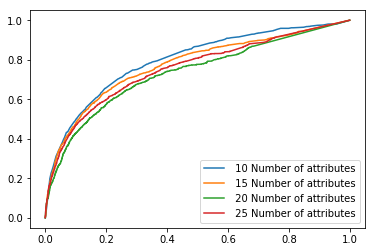

In [134]:
for n in range(10, 30, 5):
    cols_sel_mic=s.sort_values('mic', ascending=False)['att'][:n]
    rf200=RandomForestClassifier(n_estimators=200)
    rf200.fit(tr[cols_sel_mic],tr['HighUtilizationY2'])
    probs_rf200=rf200.predict_proba(ts[cols_sel_mic])
    fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['HighUtilizationY2'],probs_rf200[:,1])
    auc_rf200=auc(fpr_rf200,tpr_rf200)
    plt.plot(fpr_rf200, tpr_rf200,label =" {} Number of attributes".format(n))
    plt.legend()

In [107]:
#Using Top Attributes from Chi2 for Random Forest Model

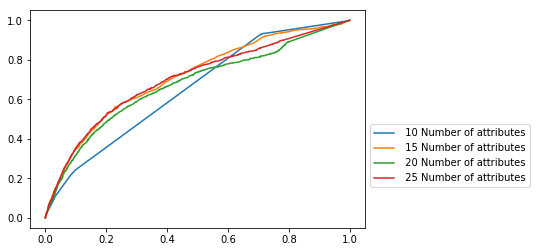

In [128]:
for n in range(10, 30, 5):
    col_sel_chi2=s.sort_values('chi2',ascending=False)['att'][:n]
    rf200=RandomForestClassifier(n_estimators=200)
    rf200.fit(tr[col_sel_chi2],tr['HighUtilizationY2'])
    probs_rf200=rf200.predict_proba(ts[col_sel_chi2])
    fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts['HighUtilizationY2'],probs_rf200[:,1])
    auc_rf200=auc(fpr_rf200,tpr_rf200)
    plt.plot(fpr_rf200, tpr_rf200, label = " {} Number of attributes".format(n))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

#3.Create a learning curve for the data to check AUC (y axis) based on size of data (x axis).

# 3.Create a learning curve for the data to check AUC (y axis) based on size of data (x axis).

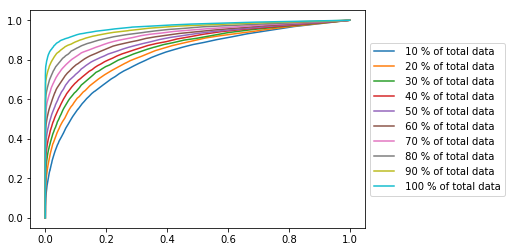

In [153]:
for n in range ( 10 , 110 , 10):
    df_new= df[:int(sz*n/100)]
    sz_new = df_new.index.size
    tr_new =df[:int(sz_new*0.8)] 
    ts_new=df[int(sz_new*0.2):]
    rf200=RandomForestClassifier(n_estimators=200)
    rf200.fit(tr_new[cols],tr_new['HighUtilizationY2'])
    probs_rf200=rf200.predict_proba(ts_new[cols])
    fpr_rf200, tpr_rf200, thresholds_rf200 = roc_curve(ts_new['HighUtilizationY2'],probs_rf200[:,1])
    auc_rf200=auc(fpr_rf200,tpr_rf200)
    plt.plot(fpr_rf200, tpr_rf200, label = " {} % of total data".format(n))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))